 # Cervical cancer (Risk Factors)   [Data Set](http://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29):

## EDA Steps:

1. Display summary statistics
2. Explore values and impute missing data
3. Display histogram of individual features
4. Visualize Distribution of values with outcomes
5. Find duplicates in the data
6. Correlation between features
7. Impute missing data using sklearn pipeline
8. Dimensionality reduciton using PCA and TSNE


In [1]:
! wget http://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv

--2020-05-11 13:17:08--  http://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102059 (100K) [application/x-httpd-php]
Saving to: ‘risk_factors_cervical_cancer.csv.2’

risk_factors_cervic 100%[===================>]  99.67K   323KB/s    in 0.3s    

2020-05-11 13:17:10 (323 KB/s) - ‘risk_factors_cervical_cancer.csv.2’ saved [102059/102059]



In [2]:
import pandas as pd
import numpy as np

In [3]:
raw_data = pd.read_csv("./risk_factors_cervical_cancer.csv")

In [4]:
raw_data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

1- Identify Columns That Contain a Single Value

2- Delete Columns That Contain a Single Value

3- Consider Columns That Have Very Few Values, redundant columns, unreleated columns

4- Merge values that have similar meaning (apply function)

5- Identify Rows that Contain Duplicate Data

6- Delete Rows that Contain Duplicate Data

7- Remove/impute rows with N/A values

8- Convert string to categorical?

9 - Check consistency of data: values greater or less than zero, relationship between values (one should be greater or less than other) etc.
 


In [7]:
# There is no float data. All data is integer in this case.

def describe_data(data):
    for column in data.columns:
        display(pd.crosstab(index=data[column],
                        columns='% observations', 
                        normalize='columns'))
        print("# of unique values {}".format(data[column].nunique()))

In [8]:
describe_data(raw_data)

col_0,% observations
Age,
13,0.001166
14,0.005828
15,0.024476
16,0.026807
17,0.040793
18,0.058275
19,0.051282
20,0.052448
21,0.053613


# of unique values 44


col_0,% observations
Number of sexual partners,
1.0,0.240093
10.0,0.001166
15.0,0.001166
2.0,0.317016
28.0,0.001166
3.0,0.242424
4.0,0.090909
5.0,0.051282
6.0,0.010490


# of unique values 13


col_0,% observations
First sexual intercourse,
10.0,0.002331
11.0,0.002331
12.0,0.006993
13.0,0.029138
14.0,0.092075
15.0,0.189977
16.0,0.141026
17.0,0.175991
18.0,0.159674


# of unique values 22


col_0,% observations
Num of pregnancies,
0.0,0.018648
1.0,0.314685
10.0,0.001166
11.0,0.001166
2.0,0.279720
3.0,0.162005
4.0,0.086247
5.0,0.040793
6.0,0.020979


# of unique values 12


col_0,% observations
Smokes,
0.0,0.841492
1.0,0.143357
?,0.015152


# of unique values 3


col_0,% observations
Smokes (years),
0.0,0.841492
0.16,0.001166
0.5,0.003497
1.0,0.009324
1.266972909,0.017483
10.0,0.005828
11.0,0.005828
12.0,0.003497
13.0,0.003497


# of unique values 31


col_0,% observations
Smokes (packs/year),
0.0,0.841492
0.001,0.001166
0.003,0.001166
0.025,0.001166
0.04,0.002331
...,...
7.5,0.001166
7.6,0.001166
8.0,0.002331


# of unique values 63


col_0,% observations
Hormonal Contraceptives,
0.0,0.313520
1.0,0.560606
?,0.125874


# of unique values 3


col_0,% observations
Hormonal Contraceptives (years),
0.0,0.313520
0.08,0.029138
0.16,0.018648
0.17,0.001166
0.25,0.047786
0.33,0.010490
0.41,0.001166
0.42,0.009324
0.5,0.029138


# of unique values 41


col_0,% observations
IUD,
0.0,0.766900
1.0,0.096737
?,0.136364


# of unique values 3


col_0,% observations
IUD (years),
0.0,0.766900
0.08,0.002331
0.16,0.001166
0.17,0.001166
0.25,0.001166
0.33,0.001166
0.41,0.001166
0.5,0.002331
0.58,0.001166


# of unique values 27


col_0,% observations
STDs,
0.0,0.785548
1.0,0.092075
?,0.122378


# of unique values 3


col_0,% observations
STDs (number),
0.0,0.785548
1.0,0.039627
2.0,0.043124
3.0,0.008159
4.0,0.001166
?,0.122378


# of unique values 6


col_0,% observations
STDs:condylomatosis,
0.0,0.826340
1.0,0.051282
?,0.122378


# of unique values 3


col_0,% observations
STDs:cervical condylomatosis,
0.0,0.877622
?,0.122378


# of unique values 2


col_0,% observations
STDs:vaginal condylomatosis,
0.0,0.872960
1.0,0.004662
?,0.122378


# of unique values 3


col_0,% observations
STDs:vulvo-perineal condylomatosis,
0.0,0.827506
1.0,0.050117
?,0.122378


# of unique values 3


col_0,% observations
STDs:syphilis,
0.0,0.856643
1.0,0.020979
?,0.122378


# of unique values 3


col_0,% observations
STDs:pelvic inflammatory disease,
0.0,0.876457
1.0,0.001166
?,0.122378


# of unique values 3


col_0,% observations
STDs:genital herpes,
0.0,0.876457
1.0,0.001166
?,0.122378


# of unique values 3


col_0,% observations
STDs:molluscum contagiosum,
0.0,0.876457
1.0,0.001166
?,0.122378


# of unique values 3


col_0,% observations
STDs:AIDS,
0.0,0.877622
?,0.122378


# of unique values 2


col_0,% observations
STDs:HIV,
0.0,0.856643
1.0,0.020979
?,0.122378


# of unique values 3


col_0,% observations
STDs:Hepatitis B,
0.0,0.876457
1.0,0.001166
?,0.122378


# of unique values 3


col_0,% observations
STDs:HPV,
0.0,0.875291
1.0,0.002331
?,0.122378


# of unique values 3


col_0,% observations
STDs: Number of diagnosis,
0,0.917249
1,0.079254
2,0.002331
3,0.001166


# of unique values 4


col_0,% observations
STDs: Time since first diagnosis,
1.0,0.017483
10.0,0.001166
11.0,0.002331
12.0,0.001166
15.0,0.001166
16.0,0.004662
18.0,0.001166
19.0,0.002331
2.0,0.010490


# of unique values 19


col_0,% observations
STDs: Time since last diagnosis,
1.0,0.019814
10.0,0.001166
11.0,0.002331
12.0,0.001166
15.0,0.001166
16.0,0.004662
18.0,0.001166
19.0,0.001166
2.0,0.011655


# of unique values 19


col_0,% observations
Dx:Cancer,
0,0.979021
1,0.020979


# of unique values 2


col_0,% observations
Dx:CIN,
0,0.98951
1,0.01049


# of unique values 2


col_0,% observations
Dx:HPV,
0,0.979021
1,0.020979


# of unique values 2


col_0,% observations
Dx,
0,0.972028
1,0.027972


# of unique values 2


col_0,% observations
Hinselmann,
0,0.959207
1,0.040793


# of unique values 2


col_0,% observations
Schiller,
0,0.913753
1,0.086247


# of unique values 2


col_0,% observations
Citology,
0,0.948718
1,0.051282


# of unique values 2


col_0,% observations
Biopsy,
0,0.935897
1,0.064103


# of unique values 2


In [9]:
#Replace missing values '?' by NaN which works with sklearn libraries
data = raw_data.replace(to_replace = '?', value = np.nan)

In [10]:
#Show the number of valid outputs in every column
for column in data.columns:
    print("{1}, {0}".format(column, data[column].count()))

858, Age
832, Number of sexual partners
851, First sexual intercourse
802, Num of pregnancies
845, Smokes
845, Smokes (years)
845, Smokes (packs/year)
750, Hormonal Contraceptives
750, Hormonal Contraceptives (years)
741, IUD
741, IUD (years)
753, STDs
753, STDs (number)
753, STDs:condylomatosis
753, STDs:cervical condylomatosis
753, STDs:vaginal condylomatosis
753, STDs:vulvo-perineal condylomatosis
753, STDs:syphilis
753, STDs:pelvic inflammatory disease
753, STDs:genital herpes
753, STDs:molluscum contagiosum
753, STDs:AIDS
753, STDs:HIV
753, STDs:Hepatitis B
753, STDs:HPV
858, STDs: Number of diagnosis
71, STDs: Time since first diagnosis
71, STDs: Time since last diagnosis
858, Dx:Cancer
858, Dx:CIN
858, Dx:HPV
858, Dx
858, Hinselmann
858, Schiller
858, Citology
858, Biopsy


In [11]:
valid_values = data.count()
n_samples = 858
n_outcomes = 4
n_features = 32
total_features = n_features * n_samples
#Valid features without the 4 coutcomes
valid_features = valid_values.sum() - n_outcomes * n_samples
missing_values = (total_features - valid_features)/ total_features * 100
print("Missing values percentage={0:.2f}%".format(missing_values))

Missing values percentage=13.19%


In [12]:
#Remove columns with minimal valid data, and data that does not vary: STDs:AIDS, STDs:cervical condylomatosis 
dropped_columns = data.drop(["STDs: Time since first diagnosis", "STDs: Time since last diagnosis", 'STDs:AIDS', 'STDs:cervical condylomatosis'], axis = 1)
dropped_columns = dropped_columns.astype(np.float)

In [13]:
# To visualize the historgram of the data, we will remove rows with at least 1 missing vlaue
dropped_nan = dropped_columns.dropna()
dropped_nan = dropped_nan.astype(np.float)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,27.264970,2.523952,17.142216,2.323353,0.143713,1.235524,0.458953,0.643713,2.290037,0.112275,0.530030,0.097305,0.166168,0.055389,0.005988,0.053892,0.022455,0.001497,0.001497,0.001497,0.019461,0.001497,0.002994,0.092814,0.025449,0.004491,0.023952,0.023952,0.044910,0.094311,0.058383,0.067365
std,8.727432,1.640299,2.852046,1.465319,0.351061,4.193611,2.336308,0.479260,3.724400,0.315942,2.001308,0.296595,0.551073,0.228910,0.077208,0.225974,0.148269,0.038691,0.038691,0.038691,0.138242,0.038691,0.054677,0.310355,0.157603,0.066915,0.153015,0.153015,0.207262,0.292480,0.234642,0.250841
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


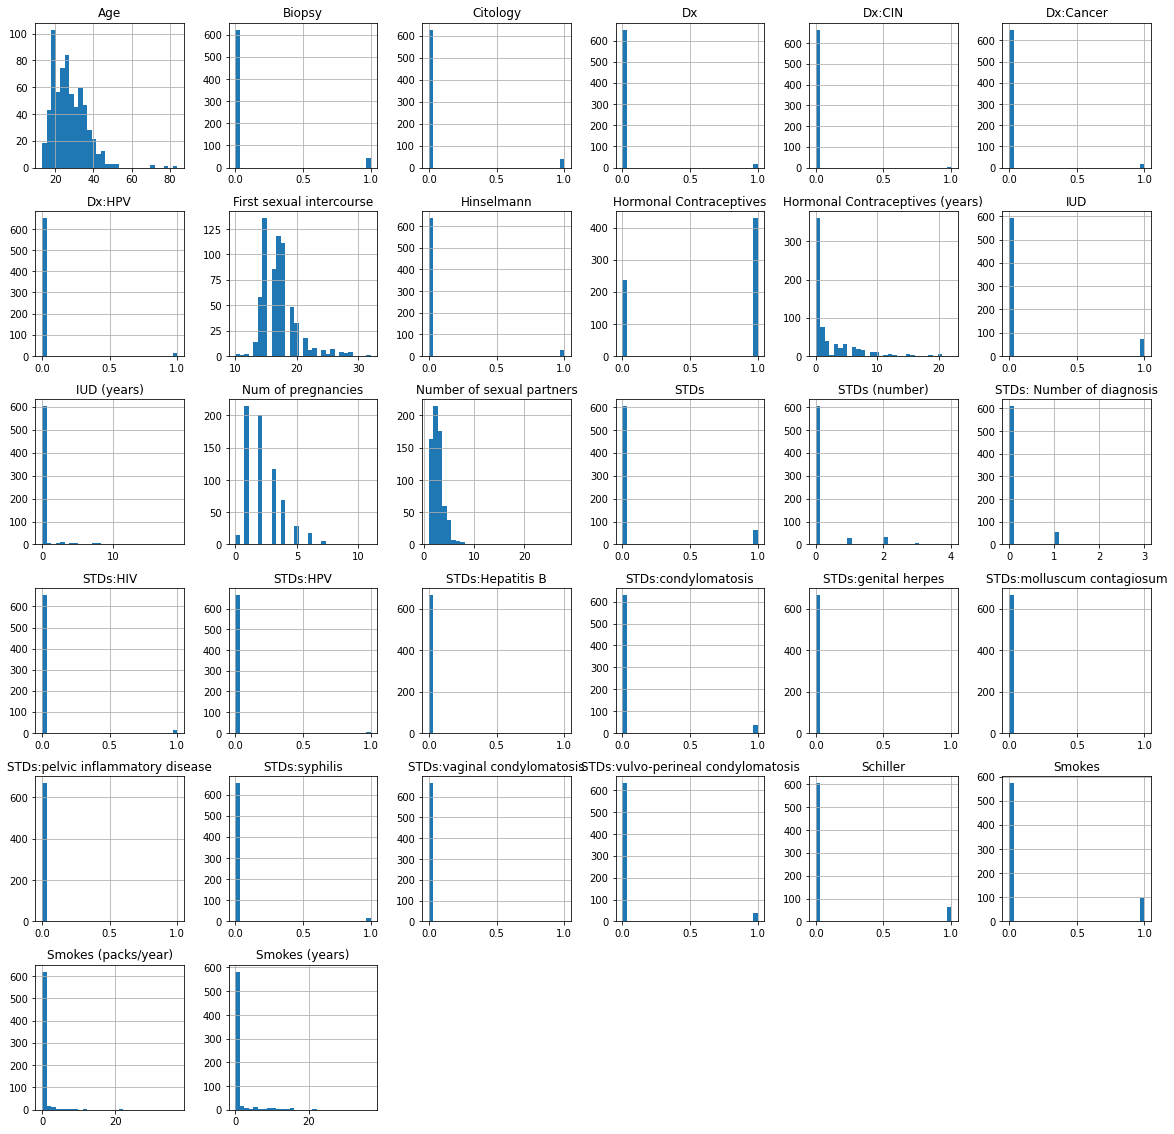

In [14]:
# show summary statistics
pd.set_option('display.max_columns', None)
display(dropped_nan.describe())

#check the table to see if any column in skweed or need to be normalized
# build histograms for each numeric feature
%matplotlib inline
hist = dropped_nan.hist(bins=30, figsize=(20,20))

In [15]:
#Remove Outlier: Number of sexual partner of 28?

In [16]:
#data imputation for numeric and categorical features
numeric_features = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)',
       'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']


categorical_features = ['Smokes',
       'Hormonal Contraceptives', 'IUD',
       'STDs', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', "Dx:Cancer", "Dx:CIN", "Dx:HPV", "Dx"]

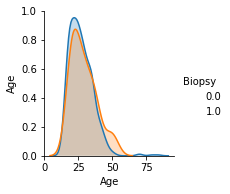

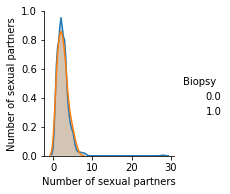

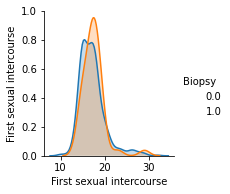

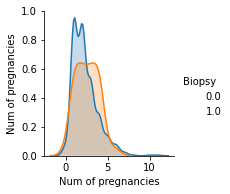

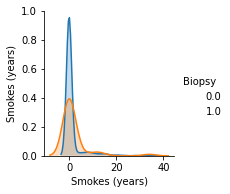

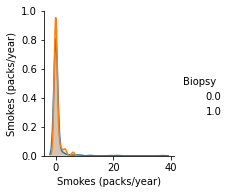

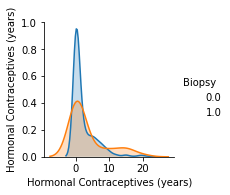

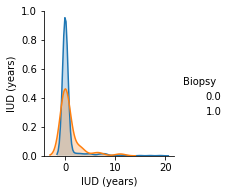

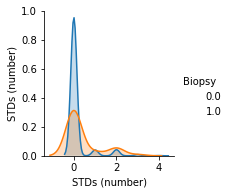

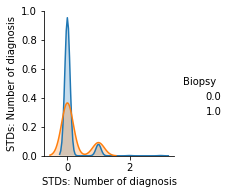

In [17]:
import seaborn as sns
for cat in numeric_features:
    sns.pairplot(dropped_nan, x_vars = cat, y_vars=cat, hue="Biopsy")

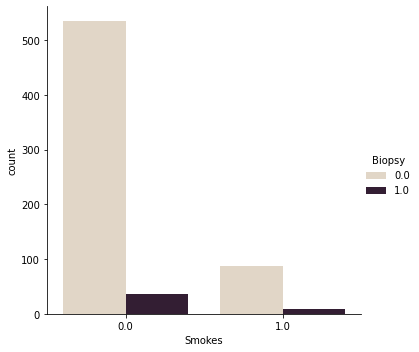

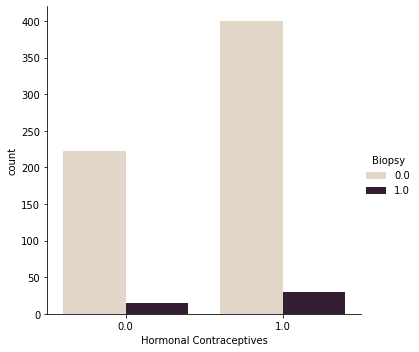

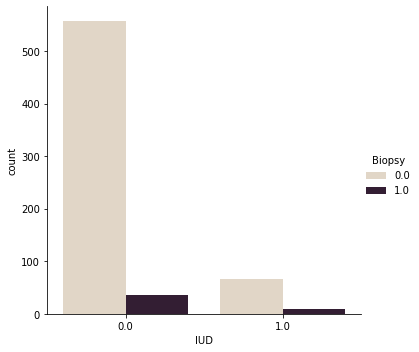

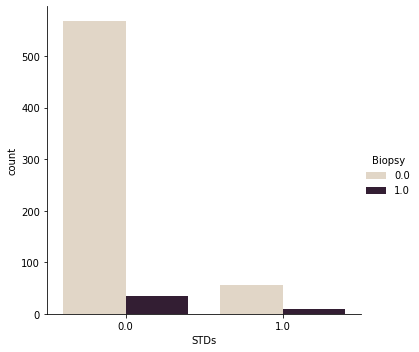

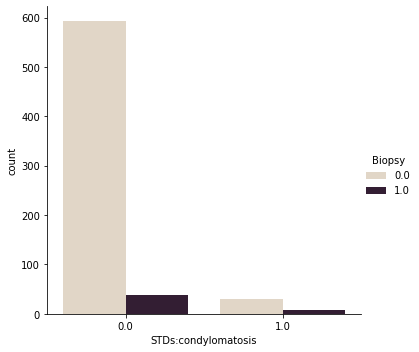

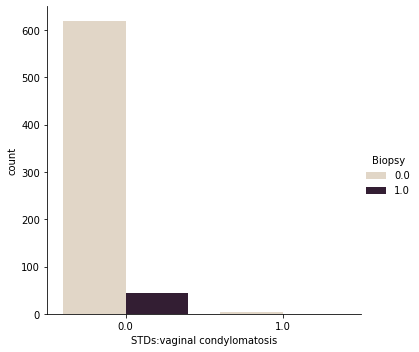

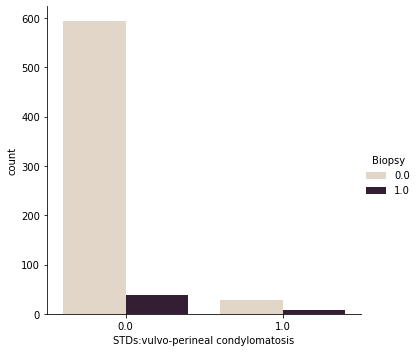

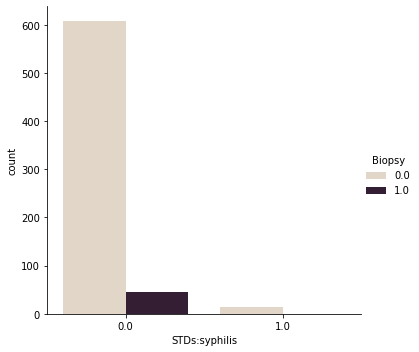

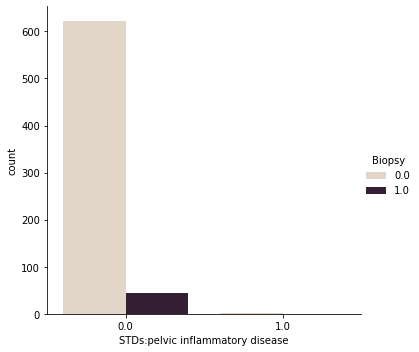

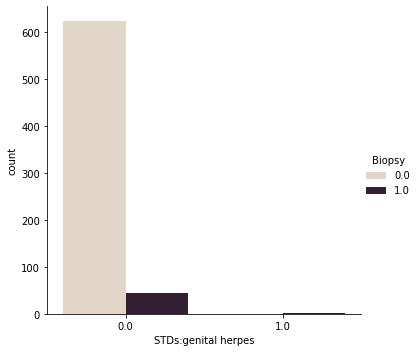

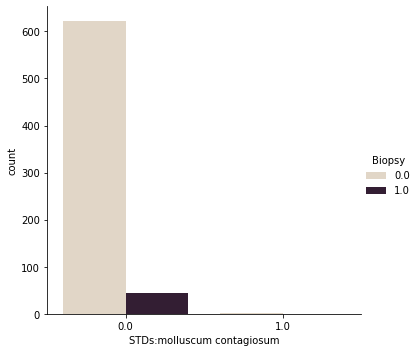

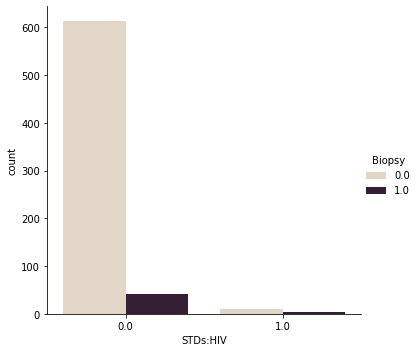

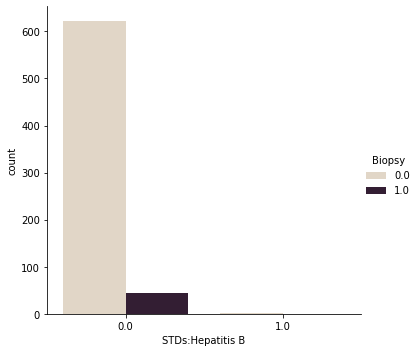

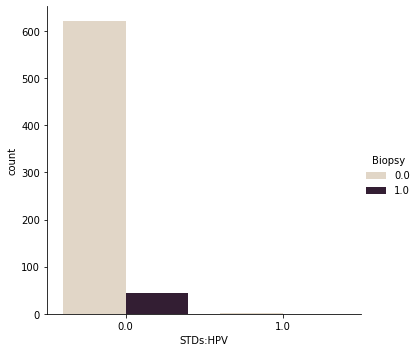

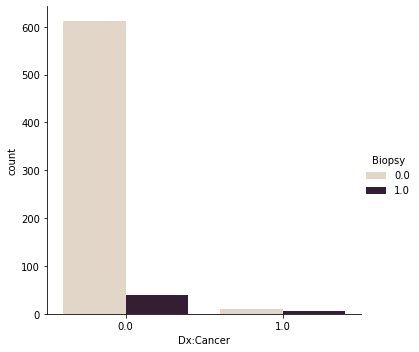

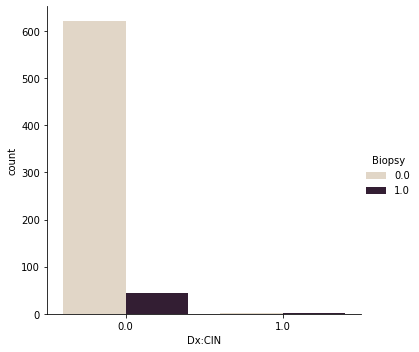

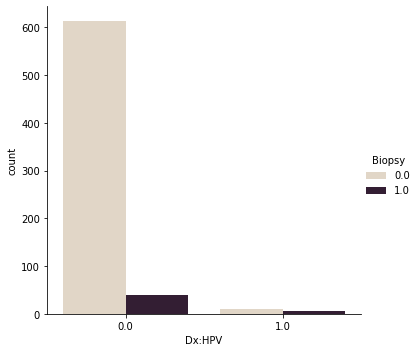

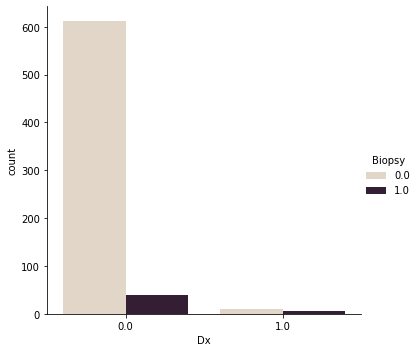

In [18]:
for cat in categorical_features:
    sns.catplot(x=cat, hue="Biopsy", kind="count", palette="ch:.25", data=dropped_nan);

In [19]:
#Inspect duplicate rows in features
features_insp = dropped_columns.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], axis = 1)

In [20]:
features_insp.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx'],
      dtype='object')

In [21]:
# Get the duplicates in features, then visualize them on the original data with outcomes

dups = features_insp.duplicated(keep=False)
data[dups].sort_values(by=['Age','Number of sexual partners', 'First sexual intercourse', 'Hormonal Contraceptives (years)'])

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
440,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
454,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
466,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
443,15,1.0,15.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0
453,15,1.0,15.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0
593,15,2.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
715,15,2.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
456,16,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
536,16,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


Regarding Biopsy there is one row "598" that gives different results. We can simply drop this row

In [22]:
#Drop row 598 and all duplicates

dropped_rows = dropped_columns.drop(598)
dropped_rows.drop_duplicates(inplace=True)
print(dropped_rows.shape)

(834, 32)


In [23]:
corr = dropped_rows[numeric_features].corr()
corr

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis
Age,1.000000,0.070615,0.361153,0.538727,0.214698,0.128872,0.279403,0.213094,-0.024376,-0.009097
Number of sexual partners,0.070615,1.000000,-0.157919,0.068033,0.184108,0.180568,0.010942,0.000660,0.037299,0.047992
First sexual intercourse,0.361153,-0.157919,1.000000,-0.074226,-0.062471,-0.059362,0.000412,-0.029632,0.003466,-0.016370
Num of pregnancies,0.538727,0.068033,-0.074226,1.000000,0.175879,0.097606,0.215055,0.151230,-0.004567,0.028314
Smokes (years),0.214698,0.184108,-0.062471,0.175879,1.000000,0.723720,0.047281,0.038226,0.096589,0.082359
Smokes (packs/year),0.128872,0.180568,-0.059362,0.097606,0.723720,1.000000,0.038769,0.015211,0.031069,0.031712
Hormonal Contraceptives (years),0.279403,0.010942,0.000412,0.215055,0.047281,0.038769,1.000000,-0.003168,-0.011242,-0.042635
IUD (years),0.213094,0.000660,-0.029632,0.151230,0.038226,0.015211,-0.003168,1.000000,0.013563,0.005839
STDs (number),-0.024376,0.037299,0.003466,-0.004567,0.096589,0.031069,-0.011242,0.013563,1.000000,0.896973
STDs: Number of diagnosis,-0.009097,0.047992,-0.016370,0.028314,0.082359,0.031712,-0.042635,0.005839,0.896973,1.000000


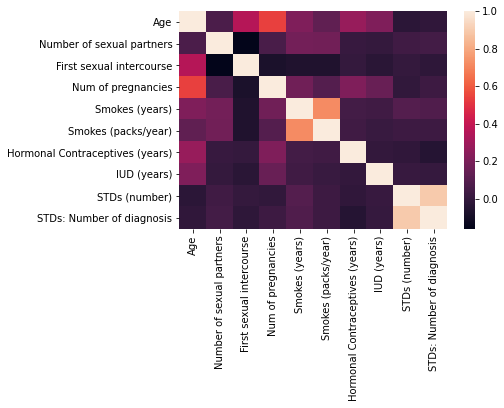

In [24]:
import seaborn as sns
sns.heatmap(corr)

In [25]:
features = dropped_rows.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], axis = 1)

In [26]:
#Define the imputation pipeline using sklearn

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
                            ('imputer', SimpleImputer(strategy='mean')),
                            ('scaler', StandardScaler())])
categorical_transformer = SimpleImputer(strategy='most_frequent') 
                                    

impute_pipeline = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [27]:
imputed_data = impute_pipeline.fit_transform(features)

In [28]:
imputed_df = pd.DataFrame(imputed_data, columns = numeric_features + categorical_features)

In [29]:
np.sum(imputed_data == np.NaN)

0

In [30]:
#subsample the features using cross correlation:
selected_features = imputed_df[['STDs', 'STDs (number)', 'STDs:HIV','STDs:genital herpes', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']].values
selected_features.shape

(834, 9)

In [31]:
#Visualize statistics before and after imputation:
column = 'Smokes'
display(pd.crosstab(index=raw_data[column],columns='% observations', normalize='columns'))
display(pd.crosstab(index=imputed_df[column],columns='% observations', normalize='columns'))

col_0,% observations
Smokes,
0.0,0.841492
1.0,0.143357
?,0.015152


col_0,% observations
Smokes,
0.0,0.852518
1.0,0.147482


In [32]:
column = 'STDs (number)'
display(pd.crosstab(index=raw_data[column],columns='% observations', normalize='columns'))
display(pd.crosstab(index=imputed_df[column],columns='% observations', normalize='columns'))

col_0,% observations
STDs (number),
0.0,0.785548
1.0,0.039627
2.0,0.043124
3.0,0.008159
4.0,0.001166
?,0.122378


col_0,% observations
STDs (number),
-3.399817e-01,0.785372
5.207751e-17,0.119904
1.536308e+00,0.040767
3.412599e+00,0.044365
5.288889e+00,0.008393
7.165179e+00,0.001199


In [33]:
#Let's check if the categories of the output was balanced or imbalanced
def describe_output(data):
    """
    Prints the probabilities in the output data
    
    Parameters:
    data: dataframe
        The input dataframe
    """
    for column in ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']:
        display(pd.crosstab(index=data[column],
                        columns='% observations', 
                        normalize='columns'))
        print("# of unique values {}".format(data[column].nunique()))

In [34]:
describe_output(dropped_rows)

col_0,% observations
Hinselmann,
0.0,0.959233
1.0,0.040767


# of unique values 2


col_0,% observations
Schiller,
0.0,0.913669
1.0,0.086331


# of unique values 2


col_0,% observations
Citology,
0.0,0.948441
1.0,0.051559


# of unique values 2


col_0,% observations
Biopsy,
0.0,0.936451
1.0,0.063549


# of unique values 2


In [35]:
# Code the outcome
outcome = dropped_rows["Biopsy"]

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
coded_outcome = LabelEncoder().fit_transform(outcome)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
imputed_numerical = imputed_df[numeric_features].values
principalComponents = pca.fit_transform(imputed_numerical)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = principalDf.join(dropped_rows[['Biopsy']].set_index(principalDf.index))
finalDf

,principal component 1,principal component 2,Biopsy
0,-1.165805,0.393996,0.0
1,-1.703554,0.530081,0.0
2,-0.792794,-0.252296,0.0
3,13.691516,-3.515006,0.0
4,1.619741,-2.082429,0.0
...,...,...,...
829,-0.787318,-0.121171,0.0
830,-0.327821,-0.666096,0.0
831,-1.342386,0.227784,0.0
832,-0.404431,-0.630276,0.0


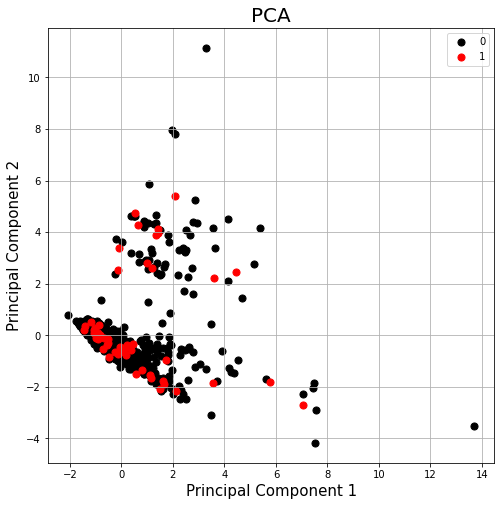

In [39]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]

colors = ['k','r','m','y','b','g','c',
          'olive','navy','indigo','brown','crimson']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Biopsy'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

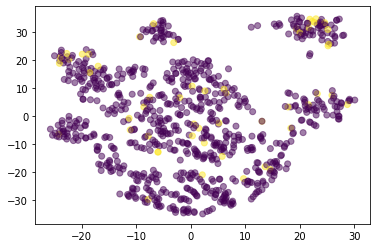

In [40]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = TSNE(learning_rate = 20)
transformed = model.fit_transform(imputed_numerical)

xs = transformed[:,0]
ys = transformed[:,1]


plt.scatter(xs, ys, c = coded_outcome, alpha = 0.5)

## No much class separation is shown in this data set!

In [42]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( imputed_data, coded_outcome, test_size = 0.1, stratify = coded_outcome)

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('cervical-cancer-pipeline.py')

from sklearn.metrics import precision_recall_fscore_support
y_pred = tpot.predict(X_test)
print(precision_recall_fscore_support(y_test, y_pred))

Generation 1 - Current best internal CV score: 0.9360000000000002
Generation 2 - Current best internal CV score: 0.9360000000000002
Generation 3 - Current best internal CV score: 0.9360000000000002
Generation 4 - Current best internal CV score: 0.9360000000000002
Generation 5 - Current best internal CV score: 0.9360000000000002

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=7, min_samples_leaf=18, min_samples_split=17)
0.9404761904761905
